# Clustering Activity

In [63]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import adjusted_rand_score
import skfuzzy.cluster as fuzz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Generate a hypothetical dataset
X, Y = make_blobs(n_samples=1000, centers=4, random_state=42, cluster_std=1.5)

Exercise: Evaluate four clustering algorithms (K-Means, Fuzzy C-Means, Spectral, and Agglomerative)
1. Apply each clustering algorithm to the dataset where:
- cluster_count = 4
- random_state = 42 (where applicable)
- do not specify affinity, metric, algo, init, linkage (if applicable)
2. Use the **Adjusted Rand index** and **Silhouette Score** to evaluate the clustering performance.
3. Compare the performance of the algorithms based on the aforementioned metrics and decide which algorithm is best suited for the data given.

In [64]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

colors = ['red', 'orange', 'lime', 'green', 'blue', 'navy', 'violet']
fig_size = 6
classes = 4     # Number of classes

***Making the Data Plot***

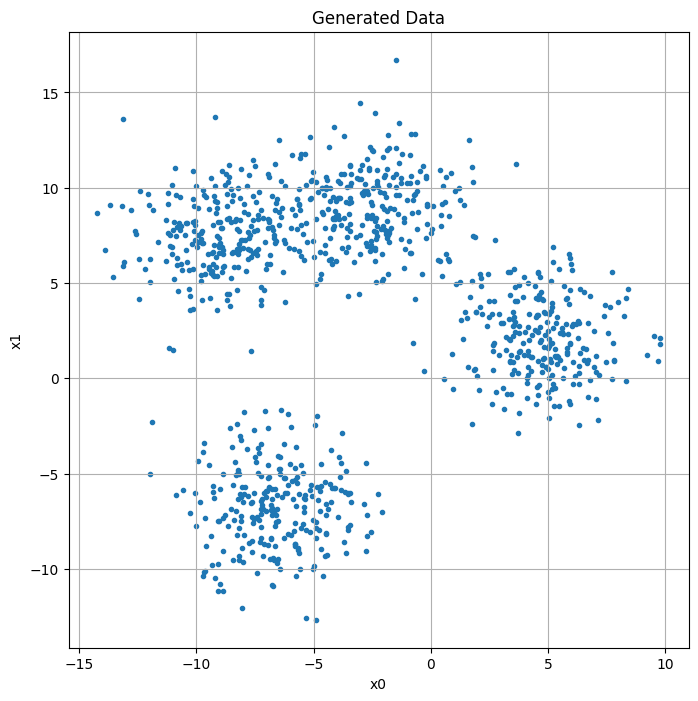

In [65]:
fig = plt.figure(figsize = (8,8))

plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Generated Data')
plt.grid()
plt.show()

***K-Means Clustering***

Adjusted Rand Score        = 0.93
Silhouette Score           = 0.60



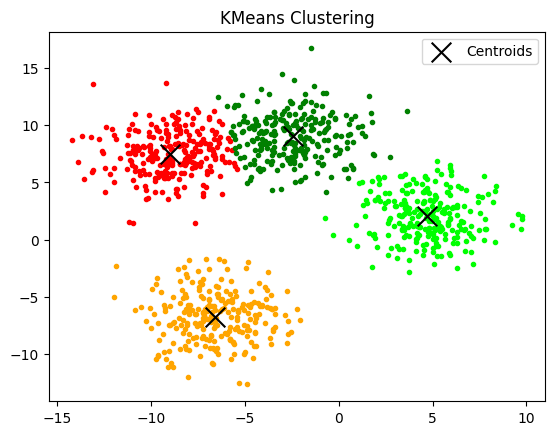

In [66]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=classes, n_init='auto').fit(X)
targ = model.predict(X)

for idx, cl in enumerate(np.unique(targ)):
    plt.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')

centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')
plt.legend()
plt.title(f"KMeans Clustering")

if Y is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f}")
print(f"Silhouette Score           = {silhouette_score(X, targ):.2f}\n")
plt.show()

***Fuzzy C-Means Clustering***

                0             1             2             3
0    7.005347e-10  9.999996e-01  7.649175e-10  4.207041e-07
1    9.460685e-09  4.934827e-09  1.000000e+00  2.316884e-09
2    2.189983e-10  1.323683e-10  1.000000e+00  5.827091e-11
3    9.999976e-01  1.475588e-07  5.205889e-07  1.706114e-06
4    9.999544e-01  2.771099e-06  2.080570e-05  2.198778e-05
..            ...           ...           ...           ...
995  1.734394e-03  1.495419e-04  9.979723e-01  1.437929e-04
996  6.994023e-07  3.641316e-06  7.584529e-09  9.999957e-01
997  5.078607e-01  1.203689e-03  6.844776e-05  4.908672e-01
998  9.448594e-09  1.671043e-08  1.000000e+00  4.746787e-09
999  6.713094e-10  9.999998e-01  1.418230e-09  1.618919e-07

[1000 rows x 4 columns]
Adjusted Rand Score        = 0.93
Silhouette Score           = 0.60



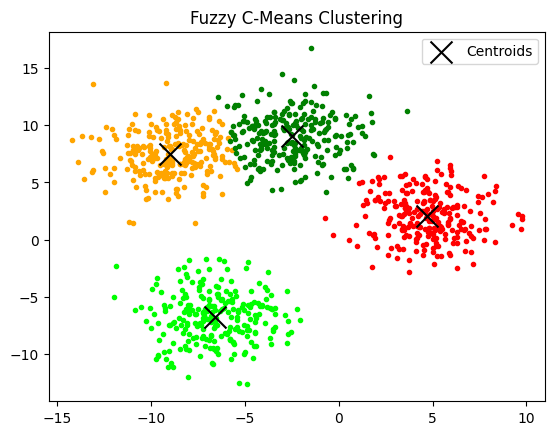

In [67]:
from skfuzzy import cmeans, cmeans_predict

centers, u, u0, d, jm, p, fpc = cmeans(data = X.T, c = classes, m = 1.25, error = 0.05, maxiter = 1000)
target2 = np.argmax(u, axis=0)

for idx, cl in enumerate(np.unique(target2)):
    plt.scatter(X[target2 == cl, 0], X[target2 == cl, 1], color=colors[idx], marker='.')
    
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=250, c='black', label='Centroids')
plt.legend()
plt.title("Fuzzy C-Means Clustering")

# Printing membership matrix
print(pd.DataFrame(u.T))

if Y is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(target2, Y):.2f}")
print(f"Silhouette Score           = {silhouette_score(X, target2):.2f}\n")

***Specteral Clustering***

Adjusted Rand Score        = 0.93
Silhouette Score           = 0.60



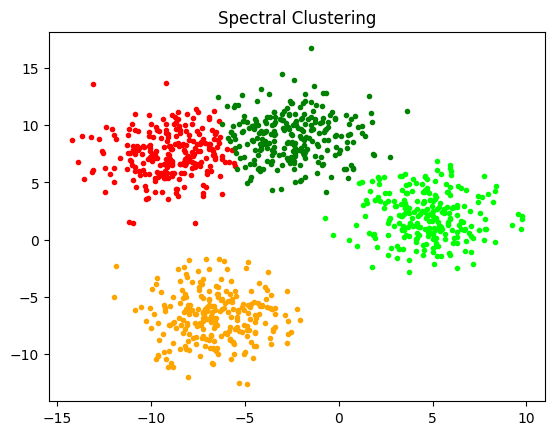

In [68]:
from sklearn.cluster import SpectralClustering

targ = SpectralClustering(n_clusters=classes, gamma=0.5).fit_predict(X)

for idx, cl in enumerate(np.unique(targ)):
    plt.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')
    
if Y is not None:
    print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f}")
print(f"Silhouette Score           = {silhouette_score(X, targ):.2f}\n")
plt.title("Spectral Clustering")
plt.show()

***Agglomerative Clustering***

In [69]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

Adjusted Rand Score        = 0.90
Silhouette Score           = 0.59


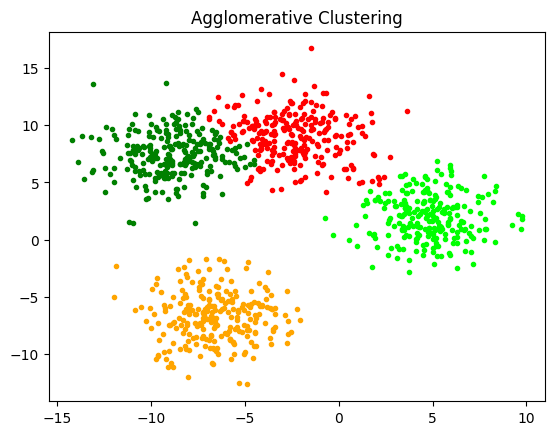

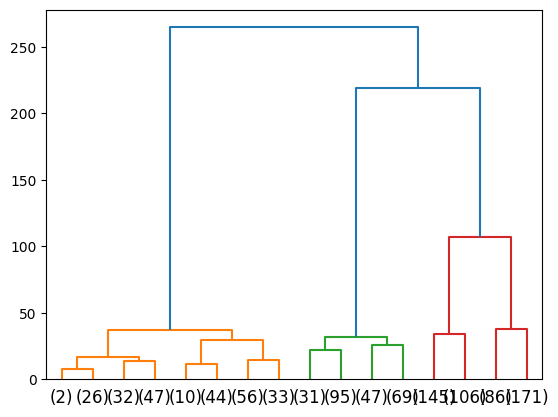

In [70]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

model.set_params(n_clusters=classes, distance_threshold=None)
targ = model.fit_predict(X)

for idx, cl in enumerate(np.unique(targ)):
    plt.scatter(X[targ == cl, 0], X[targ == cl, 1], color=colors[idx], marker='.')

if Y is not None: 
    print(f"Adjusted Rand Score        = {adjusted_rand_score(targ, Y):.2f}")
print(f"Silhouette Score           = {silhouette_score(X, targ):.2f}")
plt.title("Agglomerative Clustering")
plt.show()

plot_dendrogram(model, truncate_mode="level", p=3)
plt.show()